In [4]:
import xarray
from matplotlib import pyplot as plt

In [5]:
dsm = xarray.open_mfdataset('../data/output/opendrift_alternative_hourly_194.nc', chunks=dict(trajectory=10000))

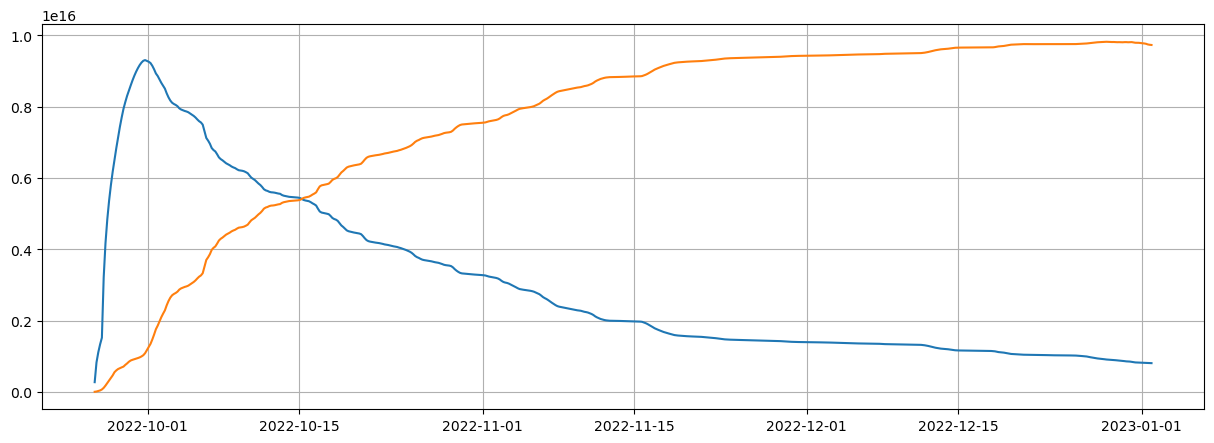

In [6]:
fig, ax = plt.subplots(figsize=[15,5])
dsm = dsm.where(dsm.status==0)
plt.plot(dsm.time, dsm['mass'].sum(dim=['trajectory']))
plt.plot(dsm.time, dsm['mass_volatilized'].sum(dim=['trajectory']))
plt.grid()

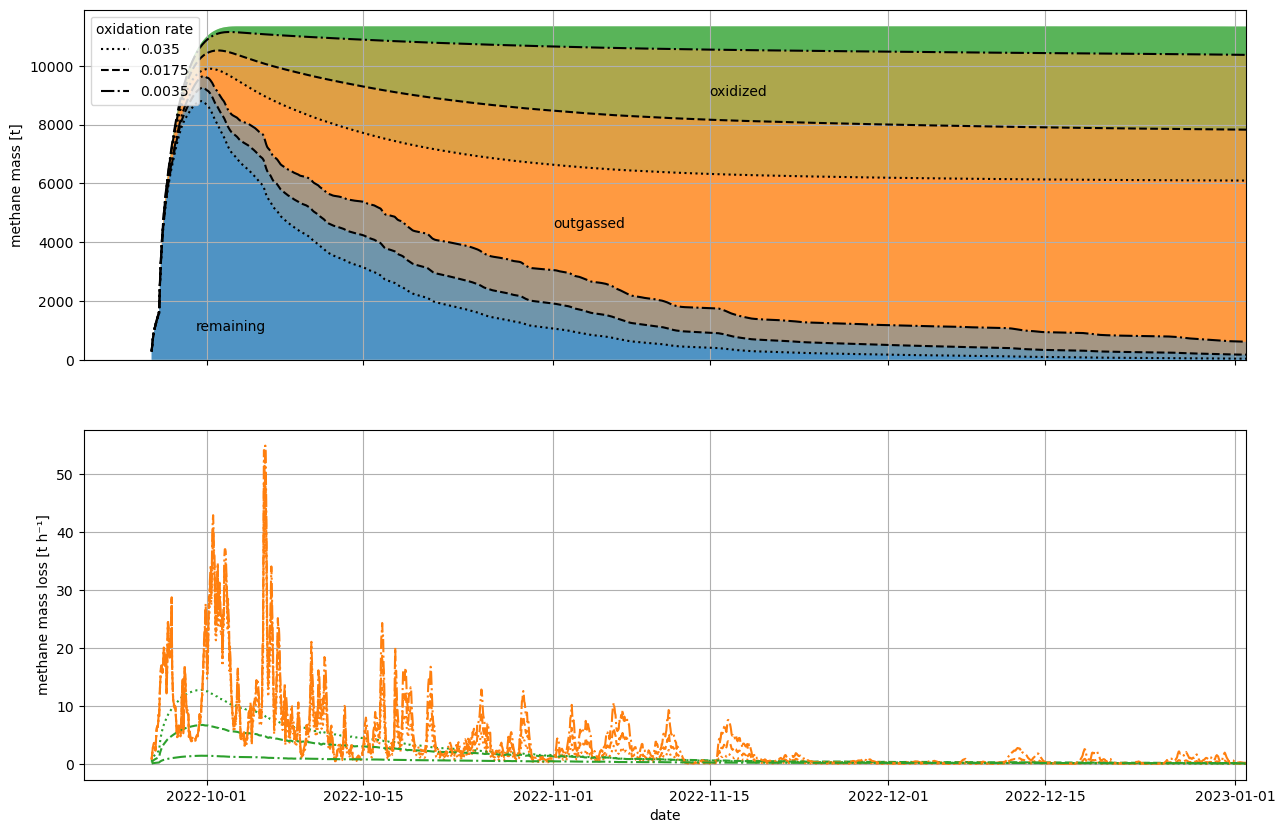

In [27]:
rddict = {170:'C1', 180:'C2', 190:'C4', 194:'k'}
rdlabels = {170:'0.035', 180:'0.0175', 190:'0.0035', 194:'0.0000'}
rdlinestyles = {170:':', 180:'--', 190:'-.', 194:'-'}

fig, axs = plt.subplots(figsize=[15,10], nrows=2, sharex=True)

looprunnumbers = [170, 180, 190]
for looprunnumber in looprunnumbers:
    dsm = xarray.open_mfdataset(f'../data/output/opendrift_alternative_hourly_{looprunnumber}.nc', chunks=dict(trajectory=10000))
    dsm_remain = dsm.where(dsm.status==0)
    axs[0].plot(dsm.time, dsm_remain['mass'].sum(dim=['trajectory'])/1e12, 
             color='k',#rddict[looprunnumber], 
             ls=rdlinestyles[looprunnumber], 
             label=rdlabels[looprunnumber])
    axs[0].plot(dsm.time, dsm_remain['mass'].sum(dim=['trajectory'])/1e12 + dsm_remain['mass_volatilized'].sum(dim=['trajectory'])/1e12 \
             +dsm.where(dsm.status==1).mass_volatilized.sum(dim='trajectory').cumsum()/1e12, 
             color='k',#rddict[looprunnumber], 
             ls=rdlinestyles[looprunnumber], 
             #label=rdlabels[looprunnumber]
            )
    
    axs[0].stackplot(dsm.time, 
                  dsm_remain['mass'].sum(dim=['trajectory'])/1e12, 
                  dsm_remain['mass_volatilized'].sum(dim=['trajectory'])/1e12 \
                  +dsm.where(dsm.status==1).mass_volatilized.sum(dim='trajectory').cumsum()/1e12,
                  dsm_remain['mass_degraded'].sum(dim=['trajectory'])/1e12 \
                  +dsm.where(dsm.status==1).mass_degraded.sum(dim='trajectory').cumsum()/1e12,
                  alpha=0.4, colors=['tab:blue', 'tab:orange', 'tab:green'])

    dsm = xarray.open_mfdataset(f'../data/output/opendrift_alternative_hourly_{looprunnumber}.nc', chunks=dict(trajectory=10000))
    dsm_remain = dsm.where(dsm.status==0)

    plt.plot(dsm.time, np.append(np.diff(dsm_remain['mass_volatilized'].sum(dim=['trajectory'])/1e12 \
    +dsm.where(dsm.status==1).mass_volatilized.sum(dim='trajectory').cumsum()/1e12,), 0), color='tab:orange', ls=rdlinestyles[looprunnumber])
    
    plt.plot(dsm.time, np.append(np.diff(dsm_remain['mass_degraded'].sum(dim=['trajectory'])/1e12 \
    +dsm.where(dsm.status==1).mass_degraded.sum(dim='trajectory').cumsum()/1e12,), 0), color='tab:green', ls=rdlinestyles[looprunnumber])

axs[0].text(x=np.datetime64('2022-11-01'), y=0.45e4, s='outgassed')
axs[0].text(x=np.datetime64('2022-11-15'), y=0.9e4, s='oxidized')
axs[0].text(x=np.datetime64('2022-09-30'), y=0.1e4, s='remaining')
axs[0].set_ylabel('methane mass [t]')
axs[1].set_ylabel('methane mass loss [t h⁻¹]')
axs[1].set_xlabel('date')
axs[0].legend(title='oxidation rate', loc='upper left')
axs[0].grid()
axs[1].grid()
axs[0].set_xlim(np.datetime64('2022-09-20'), np.datetime64('2023-01-02'))
plt.savefig('../figures/rf_mass_balance.png')